load the data

In [3]:
import pandas as pd
import numpy as np
url='https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
df =pd.read_csv(url)
df


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


preprocess the data

In [14]:
x=df.ix[:,0:4]
y=df.ix[:,4]

train test split

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
xtra=scaler.transform(X_train)
xtest=scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [20]:
def trainalgo(clf,X_train, X_test, y_train, y_test):
    clf = clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(y_test,pred)
    return acc

In [44]:
ac=[]
df1 = pd.DataFrame(columns=['maxdepth','minsam','acc'])
from sklearn import tree
for i in range(4,10):
    for j in range(5,16):
        clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i,)
        acc=trainalgo(clf,xtra, xtest, y_train, y_test)
    #print(acc)
        ac.append(acc)
        #df = pd.DataFrame(columns=[''])
        df1 = df1.append({'maxdepth': i,'minsam':j,'acc':acc}, ignore_index=True)

In [46]:
#df = pd.DataFrame(columns=['maxdepth','minsam','acc'])
#df = df.append({'A': i}, ignore_index=True)
df1.sort_values('acc')

,maxdepth,minsam,acc
61,9.0,11.0,0.668449
65,9.0,15.0,0.673797
38,7.0,10.0,0.673797
36,7.0,8.0,0.673797
33,7.0,5.0,0.673797
64,9.0,14.0,0.673797
46,8.0,7.0,0.673797
47,8.0,8.0,0.673797
48,8.0,9.0,0.673797
49,8.0,10.0,0.673797


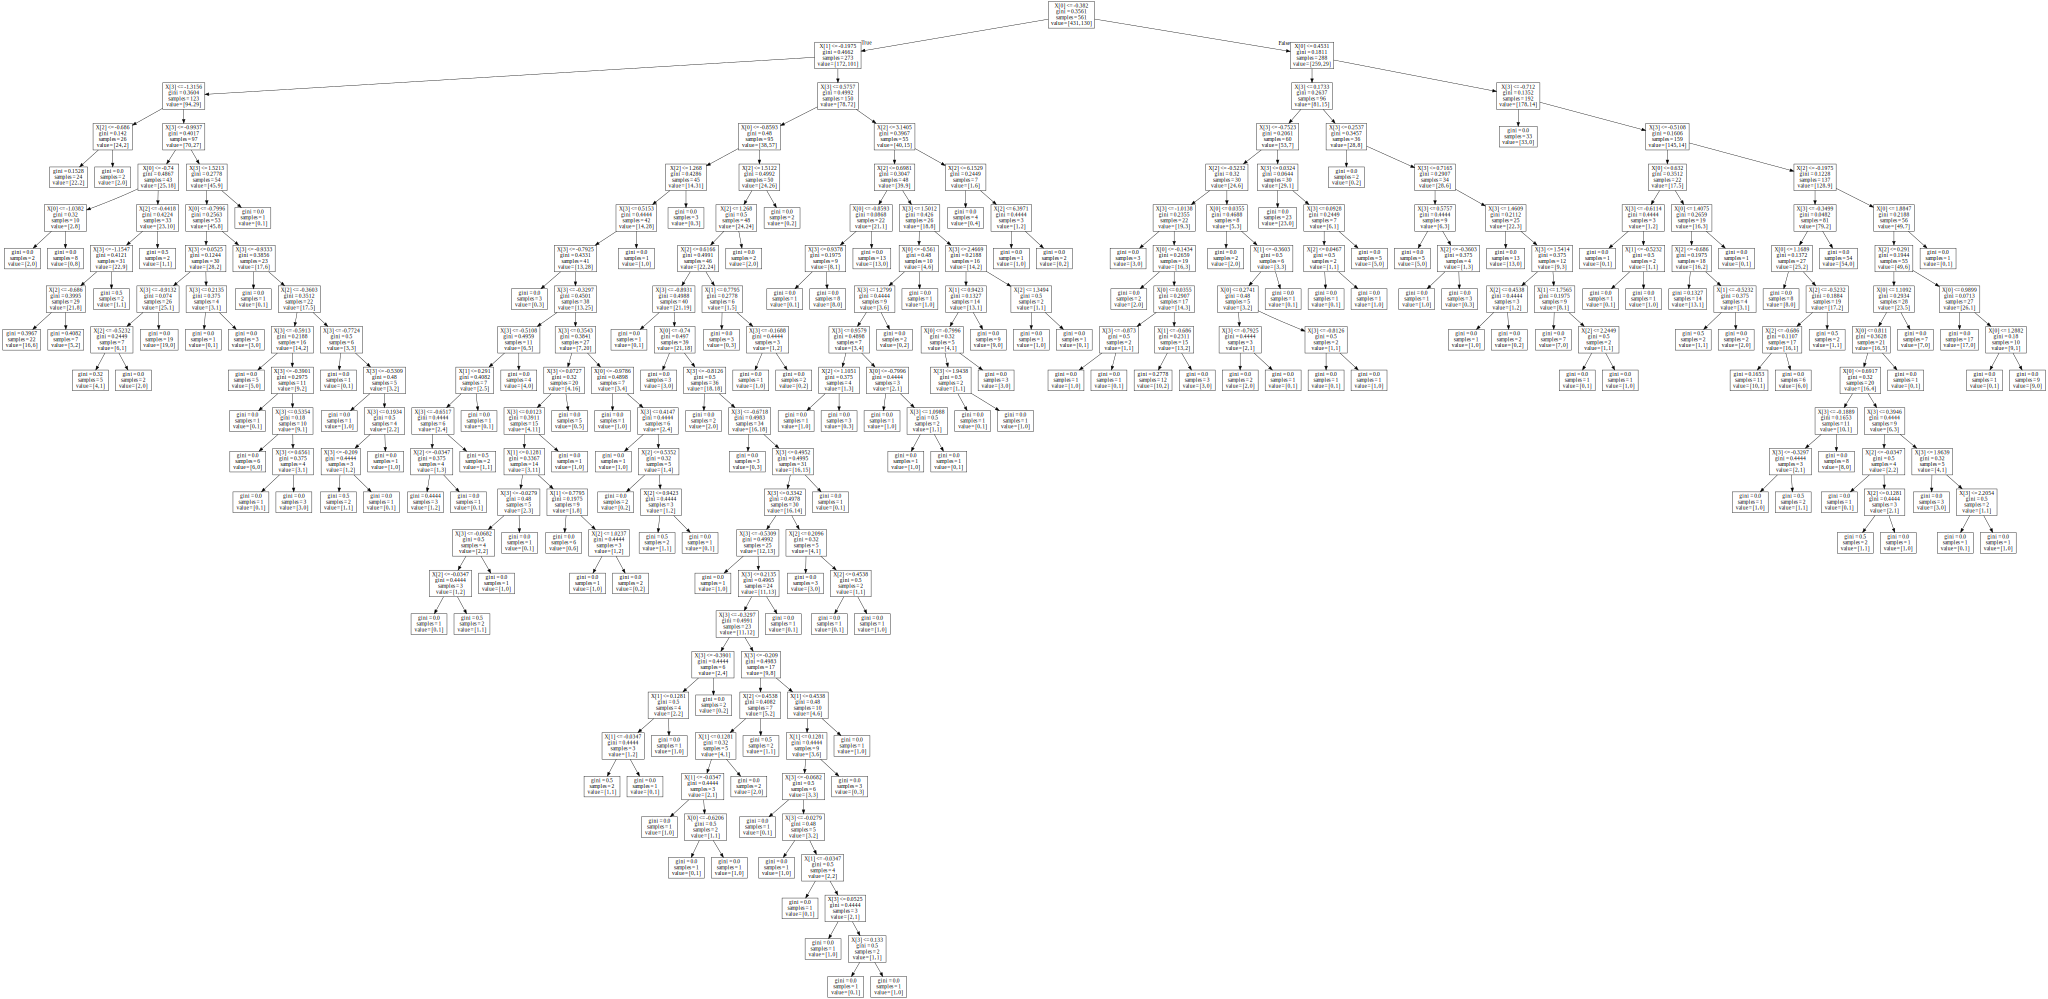

In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph